In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
df = pd.read_csv('income_evaluation.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.dtypes)

   age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors            13.0   
1   50   Self-emp-not-inc    83311   Bachelors            13.0   
2   38            Private   215646     HS-grad             9.0   
3   53            Private   234721        11th             7.0   
4   28            Private   338409   Bachelors            13.0   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0         2174.0              0             40.0   Un

In [12]:
!python -m pip install matplotlib seaborn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

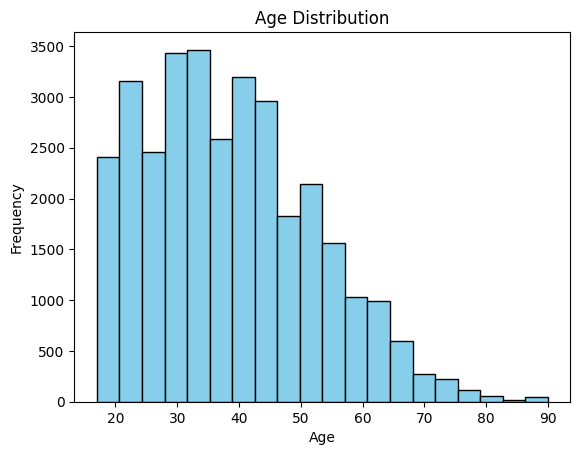

In [14]:
# Histogram
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


In [15]:
print(df.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


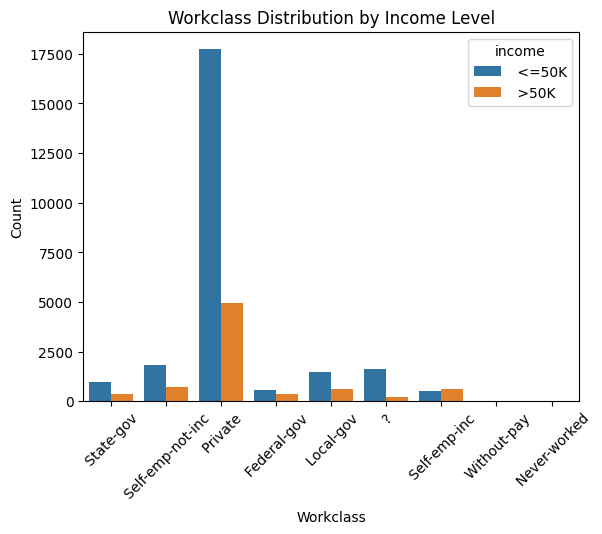

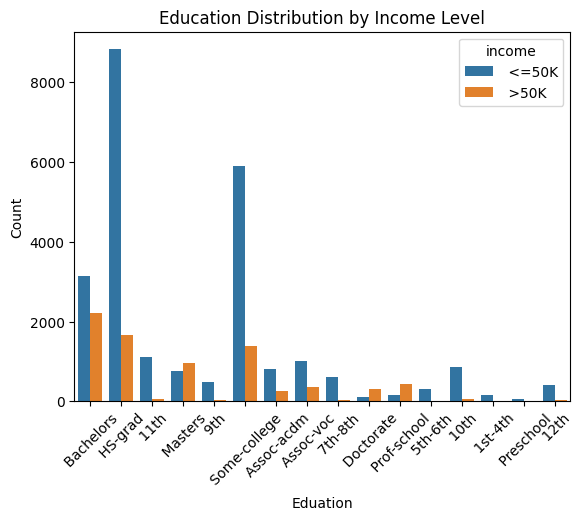

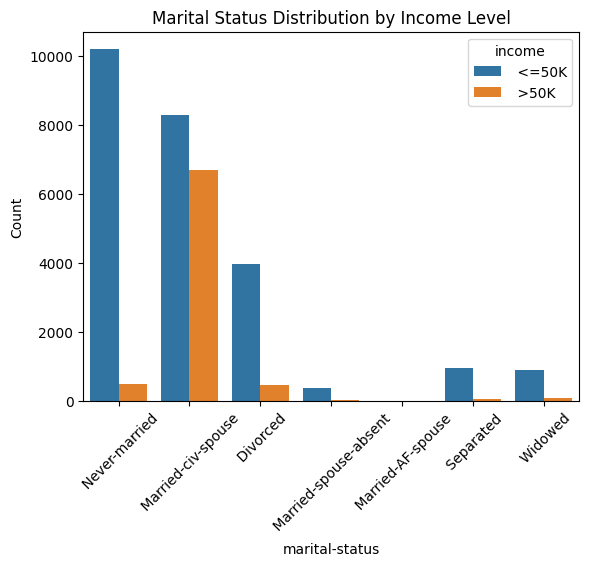

In [16]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Now, you can use the corrected column names in your visualization code
sns.countplot(x='workclass', hue='income', data=df)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass Distribution by Income Level')
plt.xticks(rotation=45)
plt.show()

# Bar Plot
sns.countplot(x='education', hue='income', data=df)
plt.xlabel('Eduation')
plt.ylabel('Count')
plt.title('Education Distribution by Income Level')
plt.xticks(rotation=45)
plt.show()

# Bar Plot
sns.countplot(x='marital-status', hue='income', data=df)
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Income Level')
plt.xticks(rotation=45)
plt.show()


In [17]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
pip install scipy.stats

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
missing_values = df.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     1
marital-status    2
occupation        0
relationship      0
race              0
sex               3
capital-gain      1
capital-loss      0
hours-per-week    2
native-country    0
income            1
dtype: int64


In [20]:
# Calculate mean for int64 columns
mean_values = df.select_dtypes(include=['int64']).mean()

# Perform mean imputation
df_mean_imputed = df.fillna(mean_values)


# Calculate mode for object columns
mode_values = df.select_dtypes(include=['object']).mode()

# Perform mode imputation
df_mode_imputed = df.fillna(mode_values)

# Calculate median for float64 columns
median_values = df.select_dtypes(include=['int64']).median()

# Perform median imputation
df_median_imputed = df.fillna(median_values)

In [21]:
# Display data types of all columns
print(df.dtypes)


age                 int64
workclass          object
fnlwgt              int64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss        int64
hours-per-week    float64
native-country     object
income             object
dtype: object


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['int64']))


In [23]:
import pandas as pd

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])


In [24]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import numpy as np
from joblib import dump

# Load your dataset
# Assuming you have loaded your dataset into a DataFrame called df

# Check for NaN values
print("Number of NaN values in each column:")
print(df.isnull().sum())

# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_imputed, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['income'])
y = df_encoded['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the models
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)
    # Make predictions
    predictions = classifier.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Store the results
    results[name] = accuracy
    # Save the trained model
    dump(classifier, f'{name}_model.joblib')


# Step 3: Display the results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")


Number of NaN values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     1
marital-status    2
occupation        0
relationship      0
race              0
sex               3
capital-gain      1
capital-loss      0
hours-per-week    2
native-country    0
income            1
dtype: int64


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN: 0.7785966528481498
SVM: 0.7956394902502687
Naive Bayes: 0.7991708889912482
Logistic Regression: 0.7994779671426377
Decision Tree: 0.8192845079072624


In [26]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
